# DSIP Assignment - First and Second part

***What we expect from you:*** Turn in your solution to all of the exercises keeping in mind that this is a
good part of your exam. You are expected to work on the exercises after you studied the theory covered
in class and the labs session we went through together. If you experience any difficulty go back to the
material we covered, check the notes, and find out where you need to study more. You can ask questions
anytime you want on what was covered in class and labs but you are not going to receive help on the
exercises you find below.

In [110]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Fourier Series
Hand in a Python notebook which computes the Fourier expansion of a real valued
function $f$ where:
- $a$ is sampled uniformly in the interval $[−2, −1]$
- $b$ is sampled uniformly in the interval $[1, 2]$
- and the function $\: f : [a, b] \rightarrow \mathbb{R} \:$ is defined as


$$

f(t)=

\begin{cases}
pe^{qt} \sin({\ln{(1+rt^2)}}) & t \in [a,0) \\
s & t \in [0,b)
\end{cases}

$$


with $p$, $q$, $r$ and $s$ are sampled uniformly in the interval $[0, 1]$.<br >
Comment the results you obtain, Gibbs phenomenon included, when using the first $20$, $40$, and $60$ harmonics

In [111]:
def function_1(samples = 300):
    """
    The function needed for the Fourier Series exercise
    """

    # defining the random period of the function
    a = np.random.uniform(-2, -1)
    b = np.random.uniform(1, 2)
    period_bound = (a, b)

    # other random parameters
    p = np.random.uniform(0, 1)
    q = np.random.uniform(0, 1)
    r = np.random.uniform(0, 1)
    s = np.random.uniform(0, 1)

    X = np.linspace(a, b, num=samples)
    Y = np.zeros(samples)

    for idx, x in enumerate(X):
        Y[idx] = p * np.e**(q*x) * np.sin( np.log(1 + r*(x**2)) ) if x < 0 else s
    
    return period_bound, X, Y 

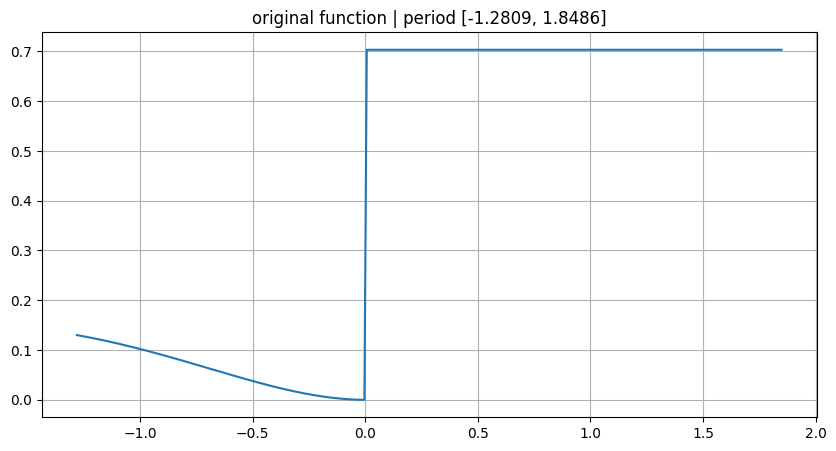

In [112]:
# plot the function
period_bound, X, Y = function_1(samples=300)

plt.figure(figsize=(10,5))
plt.title("original function | period [{:.4f}, {:.4f}]".format(period_bound[0], period_bound[1]))
plt.grid()
plt.plot(X, Y)

Lets now define the Fourier Series function

In [113]:
def fseries(x, signal, K):
    
    """
    Returns an approximation of a given signal with a Fourier series approximation
    of the first K coefficients.
    
    Parameters:
    ----------
    x: 
        independent variable (time)
    signal: 
        function of x to be approximated
    K: 
        number of harmonics to be used
    
    Returns:
    --------
    series: 
        Fourier series of the signal
    a_0: 
        coefficient with k=0 
    a: 
        array of coefficients for odd components (cosine)
    b: 
        array of coefficients for even components (sine)
    
    """
    
    # reconstructed signal
    x_reconstruct = np.zeros((len(x)))
    
    # scaling factors
    period = x[-1] - x[0]
    c = period/len(x) # scaling factor due to discrete integration
    pe_sf = 2 / period # scaling factor due to projection and expansion

    a_0 = c * np.sum(signal) * pe_sf # average of the signal over the range 
    
    ## Fourier coefficients arrays
    a = np.zeros(K)
    b = np.zeros(K)
    
    omega = 2 * np.pi / period

    for k in range(1,K+1):
        
        # evaluates coefficients
        a_k = c * ( signal @ np.cos(k * x * omega) ) * pe_sf
        a[k-1]=a_k
        
        b_k = c * ( signal @ np.sin(k * x * omega) ) * pe_sf
        b[k-1]=b_k
        
        ## computes series
        x_reconstruct = x_reconstruct + a_k * np.cos(k * x * omega) + b_k * np.sin(k * x * omega)
    
    series = a_0/2 + x_reconstruct
    
    return series, a_0, a, b

Now lets compute the Fourier Series for the first $20$, $40$ and $60$ harmonics

In [114]:
series_20, _, _, _ = fseries(X, Y, 20)
series_40, _, _, _ = fseries(X, Y, 40)
series_60, _, _, _ = fseries(X, Y, 60)

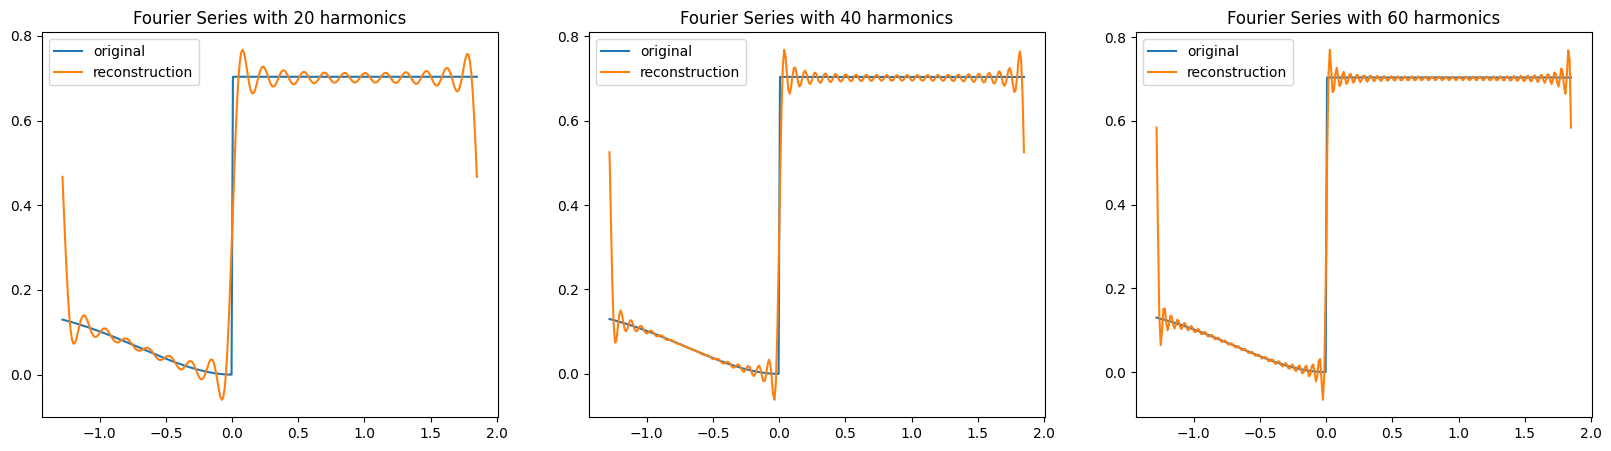

In [115]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title("Fourier Series with 20 harmonics")
plt.plot(X, Y, label="original")
plt.plot(X, series_20, label="reconstruction")
plt.legend()

plt.subplot(1, 3, 2)
plt.title("Fourier Series with 40 harmonics")
plt.plot(X, Y, label="original")
plt.plot(X, series_40, label="reconstruction")
plt.legend()

plt.subplot(1, 3, 3)
plt.title("Fourier Series with 60 harmonics")
plt.plot(X, Y, label="original")
plt.plot(X, series_60, label="reconstruction")
plt.legend()

plt.show()

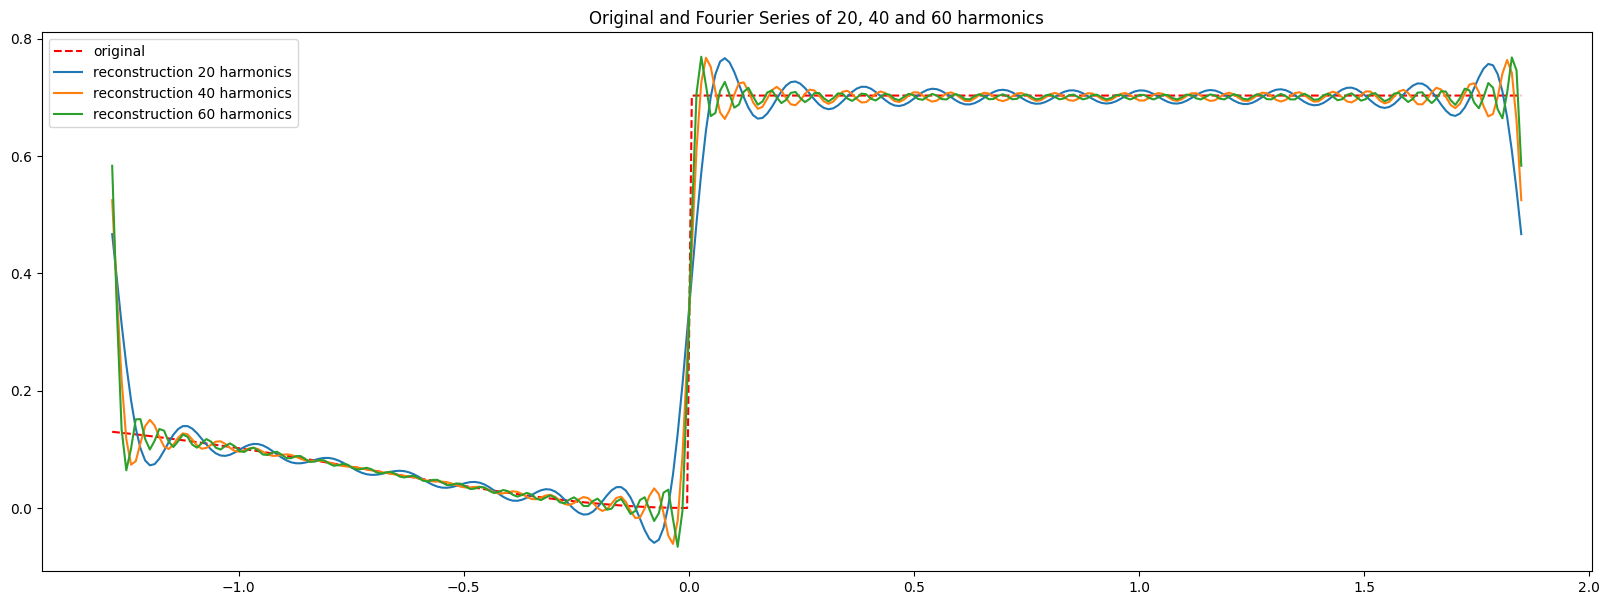

In [118]:
plt.figure(figsize=(20, 7))
plt.title("Original and Fourier Series of 20, 40 and 60 harmonics")
plt.plot(X, Y, "r--", label="original")
plt.plot(X, series_20, label="reconstruction 20 harmonics")
plt.plot(X, series_40, label="reconstruction 40 harmonics")
plt.plot(X, series_60, label="reconstruction 60 harmonics")
plt.legend()

plt.show()

### Observations
As expected the Fourier series is approximating the original signal better and better as we're highering the harmonics, if we were in a continuous case letting the harmonics going to infinity the Fourier series would approximate the signal perfectly. If we would have a better approximation of the original signal we should higher the numbers of harmonics needed for the signal reconstruction, be careful that if we high too much the number of harmonics (like 1000) we also need to have more samples for the original signal (like 5000) otherwise the Fourier Series would be off-scale <br>

As we can see in this example we also have points of discontinuity that let us appriciate the Gibbs phenomenon. This phenomenon create the characteristic oscillatory behavior around a point of discontinuity that can be observed in our plot around the 0 point. What is actually happening is that the Fourier Series is converging to the average of the $\, \lim_{x \to x^*_{\pm}} f(x) \,$ with $x^*$ point of discontinuity

## Fourier transform
Hand in a Python notebook which computes the Fourier transform of

$$ f(t) = \alpha \cos{(\omega_0 t)} + \beta \cos{(\omega_1 t)} $$

where

- $\alpha$ and $\beta$ are sampled uniformly in the interval $[−1, 1]$
- $\omega_0$ is sampled uniformly in the interval $[1, 5]$
- $\omega_1$ is sampled uniformly in the interval $[10, 20]$

Comment the results you obtain in terms of $\delta$ functions.